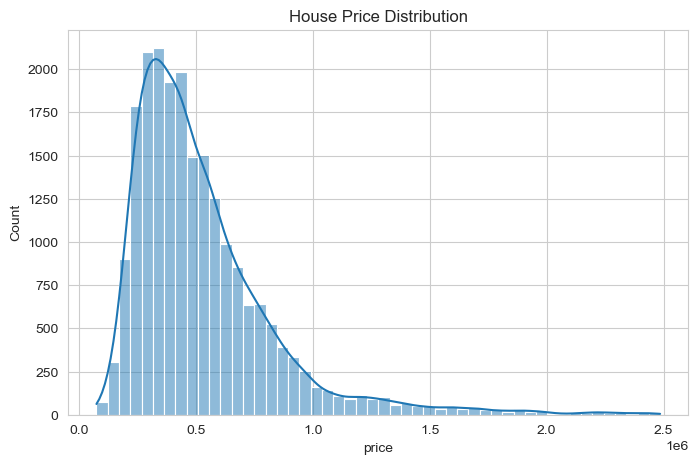

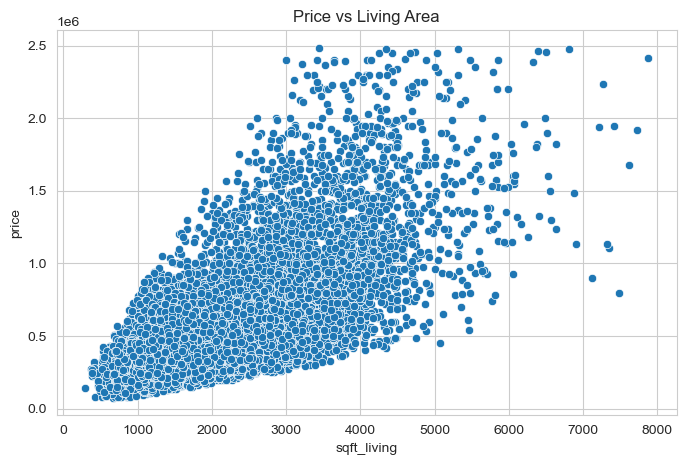

R² Score: 0.9041
Mean CV R²: 0.8945


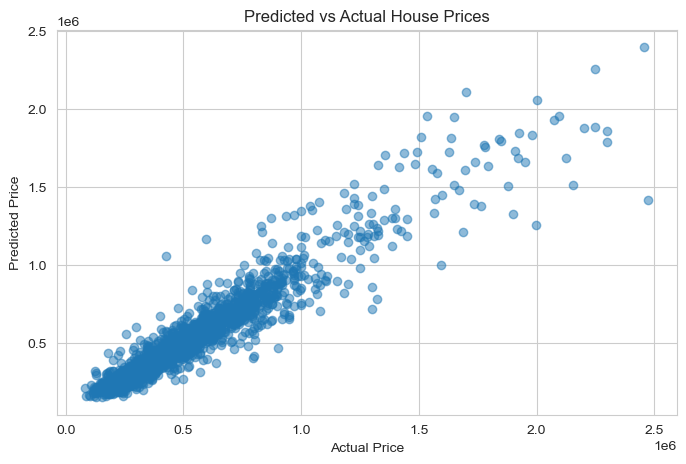

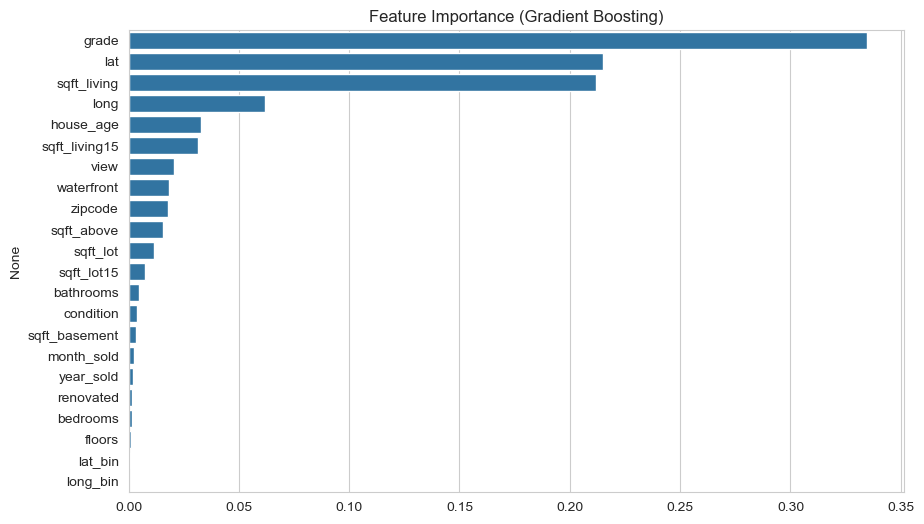

In [9]:
# =============================
# King County House Price Prediction
# =============================

# 1️⃣ Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline
sns.set_style("whitegrid")

# -----------------------------
# 2️⃣ Load dataset
url="C:/Users/anike/Downloads/kc_house_data.csv"
data = pd.read_csv(url)


# -----------------------------
# 3️⃣ Handle outliers
data = data[data.price < 2_500_000]
data = data[data.bedrooms < 10]
data = data[data.bathrooms < 8]
data = data[data.sqft_living < 10_000]

# -----------------------------
# 4️⃣ Feature engineering
data['date'] = pd.to_datetime(data['date'])
data['year_sold'] = data['date'].dt.year
data['month_sold'] = data['date'].dt.month
data['house_age'] = data['year_sold'] - data['yr_built']
data['renovated'] = data['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

# Create location bins
data['lat_bin'] = pd.cut(data['lat'], bins=10, labels=False)
data['long_bin'] = pd.cut(data['long'], bins=10, labels=False)

# Drop irrelevant columns
data = data.drop(['id', 'date', 'yr_built', 'yr_renovated'], axis=1)

# -----------------------------
# 5️⃣ Visualizations (optional)
plt.figure(figsize=(8,5))
sns.histplot(data['price'], bins=50, kde=True)
plt.title("House Price Distribution")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x='sqft_living', y='price', data=data)
plt.title("Price vs Living Area")
plt.show()

# -----------------------------
# 6️⃣ Prepare features and labels
X = data.drop('price', axis=1)
y = data['price']

# -----------------------------
# 7️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

# -----------------------------
# 8️⃣ Gradient Boosting Regressor
gbr = GradientBoostingRegressor(
    n_estimators=600, max_depth=6, learning_rate=0.05, loss='squared_error'
)
gbr.fit(X_train, y_train)

# -----------------------------
# 9️⃣ Model evaluation
y_pred = gbr.predict(X_test)
r2_score = gbr.score(X_test, y_test)
print(f"R² Score: {r2_score:.4f}")

cv_scores = cross_val_score(gbr, X_train, y_train, cv=5)
print(f"Mean CV R²: {cv_scores.mean():.4f}")

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual House Prices")
plt.show()

# -----------------------------
# 🔟 Feature importance
importances = pd.Series(gbr.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Feature Importance (Gradient Boosting)")
plt.show()
